# The Battle of the Neighborhoods

### Coursera Capstone - IBM Data Science Specialization

#### Authored By:Nishant Sharma

## Contents

1. Introduction  
2. Data Preparation  
3. Methodology  
4. Results  

## Business Problem

Our customer is ABC Bank, which is an International Bank and also a market leader. They have a wide variety of customers all over the country, major of them residing in Metropolitan cities. ABC Bank has received ample amounts of complaints from residents of Bangalore that there aren’t sufficient amount of ATM’s. Given the extremely large population and the population of the city, our customer wants to identify the best neighborhood area to open more ATM covering the majority of the population. **The problem statement will be: Which neighborhood is most densely populated and has lesser number of ATM’s?**

## Data Preparation

Importing necesary libraries

In [1]:
import pandas as pd
import numpy as np
import os
from bs4 import BeautifulSoup
import requests
# get latitude and longitude using geopy library
from geopy.geocoders import Nominatim
import requests 
from pandas.io.json import json_normalize
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
print('Libraries imported!')

Libraries imported!


### The data is not readily available. Hence, Scraping from wiki page using Beautifulsoup.

In [3]:
source_page = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore').text
soup = BeautifulSoup(source_page,'lxml')

In [4]:
neigh = []
areas = []
locality = ['Central','Eastern','North Eastern','Northern','South Eastern','Southern','Southern suburbs','Western']
for k in range(len(locality)):
    table = soup.find_all('table')[k]
    table_data = table.find_all('td')
    col_len = len(table_data)

    for i in range(0,col_len,3):
        neigh.append(table_data[i].text.strip())
        areas.append(locality[k])

In [5]:
df_neigh = pd.DataFrame(data=[neigh,areas])
df_neigh = df_neigh.transpose()
df_neigh.columns = ['Neighbourhood','Area']
df_neigh.head()

,Neighbourhood,Area
0,Cantonment area,Central
1,Domlur,Central
2,Indiranagar,Central
3,Jeevanbheemanagar,Central
4,Malleswaram,Central


### Obtaining the Coordinates for each Neighborhood using Geopy

In [6]:
address = 'Bangalore'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude
print('The geograpical coordinate of Bangalore are {}, {}.'.format(lat, long))

The geograpical coordinate of Bangalore are 12.9791198, 77.5912997.


In [7]:
neighborhoods = df_neigh['Neighbourhood'].unique().tolist()
neighborhoods

['Cantonment area',
 'Domlur',
 'Indiranagar',
 'Jeevanbheemanagar',
 'Malleswaram',
 'Pete area',
 'Sadashivanagar',
 'Seshadripuram',
 'Shivajinagar',
 'Ulsoor',
 'Vasanth Nagar',
 'Bellandur',
 'CV Raman Nagar',
 'Hoodi',
 'Krishnarajapuram',
 'Mahadevapura',
 'Marathahalli',
 'Varthur',
 'Whitefield',
 'Banaswadi',
 'HBR Layout',
 'Horamavu',
 'Kalyan Nagar',
 'Kammanahalli',
 'Lingarajapuram',
 'Ramamurthy Nagar',
 'Hebbal',
 'Jalahalli',
 'Mathikere',
 'Peenya',
 'R. T. Nagar',
 'Vidyaranyapura',
 'Yelahanka',
 'Yeshwanthpur',
 'Bommanahalli',
 'Bommasandra',
 'BTM Layout',
 'Electronic City',
 'HSR Layout',
 'Koramangala',
 'Madiwala',
 'Banashankari',
 'Basavanagudi',
 'Girinagar',
 'J. P. Nagar',
 'Jayanagar',
 'Kumaraswamy Layout',
 'Padmanabhanagar',
 'Uttarahalli',
 'Anjanapura',
 'Arekere',
 'Begur',
 'Gottigere',
 'Hulimavu',
 'Kothnur',
 'Basaveshwaranagar',
 'Kamakshipalya',
 'Kengeri',
 'Mahalakshmi Layout',
 'Nagarbhavi',
 'Nandini Layout',
 'Nayandahalli',
 'Rajajina

In [8]:
address = neighborhoods
latitude = []
longitude = []

for i in range(len(neighborhoods)):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address[i])
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        latitude.append(None)
        longitude.append(None)
#         print('The geograpical coordinate of {} are {}, {}.'.format(address[i],latitude, longitude))

In [9]:
df_new = pd.DataFrame()
df_new['Neighborhood'] = neighborhoods
df_new['Region'] = areas
df_new['Latitude'] = latitude
df_new['Longitude'] = longitude
df_new.head(3)

,Neighborhood,Region,Latitude,Longitude
0,Cantonment area,Central,8.468109,-13.250525
1,Domlur,Central,12.962467,77.638196
2,Indiranagar,Central,17.756964,77.188905


In [10]:
df_new.shape

(65, 4)

### Finding columns with null values and replacing them

In [11]:
null_columns=df_new.columns[df_new.isnull().any()]
print(df_new[df_new.isnull().any(axis=1)][null_columns])

   Latitude  Longitude
3       NaN        NaN


In [12]:
df_new.loc[df_new['Neighborhood'] == 'Jeevanbheemanagar','Latitude'] = 12.968926
df_new.loc[df_new['Neighborhood'] == 'Jeevanbheemanagar','Longitude'] = 77.652705
df_new

,Neighborhood,Region,Latitude,Longitude
0,Cantonment area,Central,8.468109,-13.250525
1,Domlur,Central,12.962467,77.638196
2,Indiranagar,Central,17.756964,77.188905
3,Jeevanbheemanagar,Central,12.968926,77.652705
4,Malleswaram,Central,16.355021,81.267918
5,Pete area,Central,48.456481,-124.100379
6,Sadashivanagar,Central,13.007708,77.579589
7,Seshadripuram,Central,16.704499,80.546672
8,Shivajinagar,Central,14.477606,78.731361
9,Ulsoor,Central,12.977879,77.624670


In [13]:
# number of neighborhoods and regions in the city
print('The number of neighborhoods in Bangalore is: {}'.format(df_new['Neighborhood'].nunique()))
print('The number of regions in Bangalore is: {}'.format(df_new['Region'].nunique()))

The number of neighborhoods in Bangalore is: 65
The number of regions in Bangalore is: 8


#### Visualize the neighborhoods using folium map

In [14]:
map_bang = folium.Map(location=[lat, long], zoom_start=11)

# add markers to map
for lati, lng, region, neighborhood in zip(df_new['Latitude'], 
                                           df_new['Longitude'], 
                                           df_new['Region'], 
                                           df_new['Neighborhood']):
    label = '{} - {}'.format(neighborhood,region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lati, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bang)  
    
map_bang

## Methodology

FourSquare Credentials and version

In [16]:
LIMIT = 100
radius = 500
CLIENT_ID = 'XXX' 
CLIENT_SECRET = 'XXX'
VERSION = '20180605'

Function to get nearby venues using foursquare

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
         # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    
    
         

In [18]:
bangalore_venues = getNearbyVenues(names=df_new['Neighborhood'],
                                   latitudes=df_new['Latitude'],
                                   longitudes=df_new['Longitude']
                                  )

Cantonment area
Domlur
Indiranagar
Jeevanbheemanagar
Malleswaram
Pete area
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kalyan Nagar
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout
Electronic City
HSR Layout
Koramangala
Madiwala
Banashankari
Basavanagudi
Girinagar
J. P. Nagar
Jayanagar
Kumaraswamy Layout
Padmanabhanagar
Uttarahalli
Anjanapura
Arekere
Begur
Gottigere
Hulimavu
Kothnur
Basaveshwaranagar
Kamakshipalya
Kengeri
Mahalakshmi Layout
Nagarbhavi
Nandini Layout
Nayandahalli
Rajajinagar
Rajarajeshwari Nagar
Vijayanagar


In [19]:
print('There are {} uniques categories.'.format(len(bangalore_venues['Venue Category'].unique())))

There are 120 uniques categories.


Finding the count of each venue in each neighborhood

In [20]:
bangalore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
BTM Layout,31,31,31,31,31,31
Banaswadi,7,7,7,7,7,7
Basaveshwaranagar,10,10,10,10,10,10
Begur,33,33,33,33,33,33
CV Raman Nagar,1,1,1,1,1,1
Cantonment area,1,1,1,1,1,1
Domlur,20,20,20,20,20,20
Electronic City,8,8,8,8,8,8
Girinagar,4,4,4,4,4,4


Analyse each neighborhood

In [21]:
# one hot encoding
bang_onehot = pd.get_dummies(bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bang_onehot['Neighborhood'] = bangalore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bang_onehot.columns[-1]] + list(bang_onehot.columns[:-1])
bang_onehot = bang_onehot[fixed_columns]

bang_onehot.head()

,Neighborhood,ATM,Accessories Store,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Tapas Restaurant,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Cantonment area,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Domlur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Domlur,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Domlur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Domlur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
bang_onehot.shape

(476, 121)

Group rows by neighborhood

In [23]:
bangalore_grouped = bang_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_grouped

,Neighborhood,ATM,Accessories Store,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Tapas Restaurant,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,BTM Layout,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.0000,0.000000
1,Banaswadi,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.142857,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.0000,0.000000
2,Basaveshwaranagar,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.100,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
3,Begur,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.030303,0.000000,...,0.00,0.000000,0.000000,0.000000,0.121212,0.000000,0.000000,0.000000,0.0000,0.000000
4,CV Raman Nagar,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
5,Cantonment area,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
6,Domlur,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.050000,...,0.05,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0500,0.000000
7,Electronic City,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.125,0.000000,0.125000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
8,Girinagar,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
9,HBR Layout,0.000000,0.0,0.000000,0.000000,0.0000,0.0000,0.000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


Obtain top 5 venues in each neighborhood

In [24]:
num_top_venues = 5

for hood in bangalore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bangalore_grouped[bangalore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BTM Layout----
                venue  freq
0   Indian Restaurant  0.19
1         Snack Place  0.10
2      Ice Cream Shop  0.10
3  Chinese Restaurant  0.10
4              Bakery  0.06


----Banaswadi----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.29
1                       Pharmacy  0.14
2              Kerala Restaurant  0.14
3              Indian Restaurant  0.14
4                  Grocery Store  0.14


----Basaveshwaranagar----
                  venue  freq
0     Indian Restaurant   0.2
1  Fast Food Restaurant   0.2
2        Ice Cream Shop   0.1
3             Juice Bar   0.1
4                  Park   0.1


----Begur----
                      venue  freq
0  Mediterranean Restaurant  0.18
1          Tapas Restaurant  0.12
2                     Hotel  0.09
3        Spanish Restaurant  0.06
4              Cocktail Bar  0.06


----CV Raman Nagar----
                      venue  freq
0         Indian Restaurant   1.0
1                       ATM   0.0
2  M

Function to sort venues in descending order

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a dataframe and store the top 5 most common venues

In [26]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_grouped['Neighborhood']

for ind in np.arange(bangalore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BTM Layout,Indian Restaurant,Snack Place,Ice Cream Shop,Chinese Restaurant,Sandwich Place
1,Banaswadi,Vegetarian / Vegan Restaurant,Pharmacy,Grocery Store,Kerala Restaurant,Indian Restaurant
2,Basaveshwaranagar,Indian Restaurant,Fast Food Restaurant,Park,Ice Cream Shop,Burger Joint
3,Begur,Mediterranean Restaurant,Tapas Restaurant,Hotel,Cocktail Bar,Café
4,CV Raman Nagar,Indian Restaurant,Women's Store,Food,Cosmetics Shop,Deli / Bodega
5,Cantonment area,Bed & Breakfast,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store
6,Domlur,Indian Restaurant,Café,Pub,Chinese Restaurant,Liquor Store
7,Electronic City,Food,Seafood Restaurant,Market,Dim Sum Restaurant,Noodle House
8,Girinagar,Smoke Shop,Fast Food Restaurant,Bus Station,Park,Gourmet Shop
9,HBR Layout,Hotel,Road,Grocery Store,North Indian Restaurant,Café


## Clustering

Creating five clusters of the neighborhood

In [27]:
# set number of clusters
kclusters = 5

bangalore_grouped_clustering = bangalore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 0, 2, 1, 1, 1, 1], dtype=int32)

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bangalore_merged = df_new

# merge bangalore_grouped with df_new to add latitude/longitude for each neighborhood
bangalore_merged = bangalore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Ignore any Nan values in the DataFrame

In [29]:
bangalore_merged = bangalore_merged[np.isfinite(bangalore_merged['Cluster Labels'])]
bangalore_merged['Cluster Labels'] = bangalore_merged['Cluster Labels'].astype(int)

Create a map of the clusters

In [30]:
# create map
map_clusters = folium.Map(location=[lat, long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangalore_merged['Latitude'], bangalore_merged['Longitude'], bangalore_merged['Neighborhood'], bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 0

In [31]:
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 0, bangalore_merged.columns[[0] + list(range(5, bangalore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Jeevanbheemanagar,Indian Restaurant,Dessert Shop,Chinese Restaurant,Café,Grocery Store
12,CV Raman Nagar,Indian Restaurant,Women's Store,Food,Cosmetics Shop,Deli / Bodega
13,Hoodi,Indian Restaurant,Bus Station,Furniture / Home Store,Women's Store,Food
16,Marathahalli,Indian Restaurant,Clothing Store,Café,Breakfast Spot,Restaurant
21,Horamavu,Indian Restaurant,Chinese Restaurant,Athletics & Sports,Women's Store,Food
30,R. T. Nagar,Indian Restaurant,Playground,Cosmetics Shop,Women's Store,Food


### Cluster 1

In [32]:
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 1, bangalore_merged.columns[[0] + list(range(5, bangalore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Domlur,Indian Restaurant,Café,Pub,Chinese Restaurant,Liquor Store
6,Sadashivanagar,Coffee Shop,Department Store,Café,Women's Store,Snack Place
9,Ulsoor,Hotel,Indian Restaurant,Café,Light Rail Station,Food
10,Vasanth Nagar,Hotel,Indian Restaurant,Nightclub,Coffee Shop,Art Gallery
18,Whitefield,Sandwich Place,Park,Tram Station,Gym,Supermarket
19,Banaswadi,Vegetarian / Vegan Restaurant,Pharmacy,Grocery Store,Kerala Restaurant,Indian Restaurant
20,HBR Layout,Hotel,Road,Grocery Store,North Indian Restaurant,Café
22,Kalyan Nagar,Fast Food Restaurant,Café,Indian Restaurant,Korean Restaurant,Ice Cream Shop
23,Kammanahalli,Pizza Place,Diner,Historic Site,Convenience Store,Cosmetics Shop
25,Ramamurthy Nagar,Indian Restaurant,Optical Shop,Shoe Store,Women's Store,Fast Food Restaurant


### Cluster 2

In [33]:
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 2, bangalore_merged.columns[[0] + list(range(5, bangalore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cantonment area,Bed & Breakfast,Women's Store,Food & Drink Shop,Deli / Bodega,Department Store


### Cluster 3

In [34]:
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 3, bangalore_merged.columns[[0] + list(range(5, bangalore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Varthur,Pharmacy,Historic Site,Convenience Store,Cosmetics Shop,Deli / Bodega


### Cluster 4

In [35]:
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 4, bangalore_merged.columns[[0] + list(range(5, bangalore_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
61,Nayandahalli,Electronics Store,Miscellaneous Shop,Women's Store,Historic Site,Cosmetics Shop


### Count of neighborhoods in each cluster

In [36]:
bangalore_merged.groupby('Cluster Labels').count()['Neighborhood']

Cluster Labels
0     6
1    35
2     1
3     1
4     1
Name: Neighborhood, dtype: int64

Obtain the Neighborhood data

In [37]:
path=r"Bangalore neighborhoods.csv"
df_new.to_csv(path)
df_reg = pd.read_csv('Bangalore neighborhoods.csv')
df_reg.head()

,Unnamed: 0,Neighborhood,Region,Latitude,Longitude
0,0,Cantonment area,Central,8.468109,-13.250525
1,1,Domlur,Central,12.962467,77.638196
2,2,Indiranagar,Central,17.756964,77.188905
3,3,Jeevanbheemanagar,Central,12.968926,77.652705
4,4,Malleswaram,Central,16.355021,81.267918


Obtain the Population data

In [38]:
df_pop = pd.read_csv('Bangalore populations.csv')
df_pop.head()

,Unnamed: 0,Neighborhood,Population
0,0,Cantonment area,153465
1,1,Domlur,86452
2,2,Indiranagar,95463
3,3,Jeevanbheemanagar,74562
4,4,Malleswaram,74563


Merge the population data with the neighborhood data

In [39]:
df_bang = df_reg.merge(df_pop,on='Neighborhood',how='inner',left_index=True)
df_bang.head()

,Unnamed: 0_x,Neighborhood,Region,Latitude,Longitude,Unnamed: 0_y,Population
0,0,Cantonment area,Central,8.468109,-13.250525,0,153465
1,1,Domlur,Central,12.962467,77.638196,1,86452
2,2,Indiranagar,Central,17.756964,77.188905,2,95463
3,3,Jeevanbheemanagar,Central,12.968926,77.652705,3,74562
4,4,Malleswaram,Central,16.355021,81.267918,4,74563


sorting the neighborhoods based on population

In [40]:
df_sorted = df_bang.sort_values(by='Population', ascending=False, inplace=False)

In [41]:
df_top = df_sorted.head(15)
df_top = df_top.reset_index(drop=True)
df_top

,Unnamed: 0_x,Neighborhood,Region,Latitude,Longitude,Unnamed: 0_y,Population
0,0,Cantonment area,Central,8.468109,-13.250525,0,153465
1,37,Electronic City,South Eastern,16.836434,96.176410,37,110526
2,12,CV Raman Nagar,Eastern,19.060022,72.923730,12,105698
3,44,J. P. Nagar,Southern,12.909492,77.596739,44,102526
4,20,HBR Layout,North Eastern,13.035870,77.632360,20,97265
5,19,Banaswadi,North Eastern,13.014162,77.651854,19,95745
6,39,Koramangala,South Eastern,13.292399,77.751926,39,95483
7,2,Indiranagar,Central,17.756964,77.188905,2,95463
8,63,Rajarajeshwari Nagar,Western,12.927428,77.515372,63,94571
9,26,Hebbal,Northern,13.038218,77.591900,26,93846


Convert the population column to percentage

In [42]:
df_top['Population'] = (100. * df_top['Population'] / df_top['Population'].sum() ).round(2)

In [44]:
df_top.rename(columns={'Population':'Population %'},inplace=True)
df_top = df_top.drop(columns=['Region','Latitude','Longitude'],axis=1)
df_top.drop(df_top.columns[df_top.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
print(df_top)

            Neighborhood  Population %
0        Cantonment area         10.24
1        Electronic City          7.37
2         CV Raman Nagar          7.05
3            J. P. Nagar          6.84
4             HBR Layout          6.49
5              Banaswadi          6.39
6            Koramangala          6.37
7            Indiranagar          6.37
8   Rajarajeshwari Nagar          6.31
9                 Hebbal          6.26
10          Shivajinagar          6.19
11           Vijayanagar          6.11
12            Whitefield          6.11
13           R. T. Nagar          6.00
14    Mahalakshmi Layout          5.91


Visualize the data in a bar plot to obtain better insights

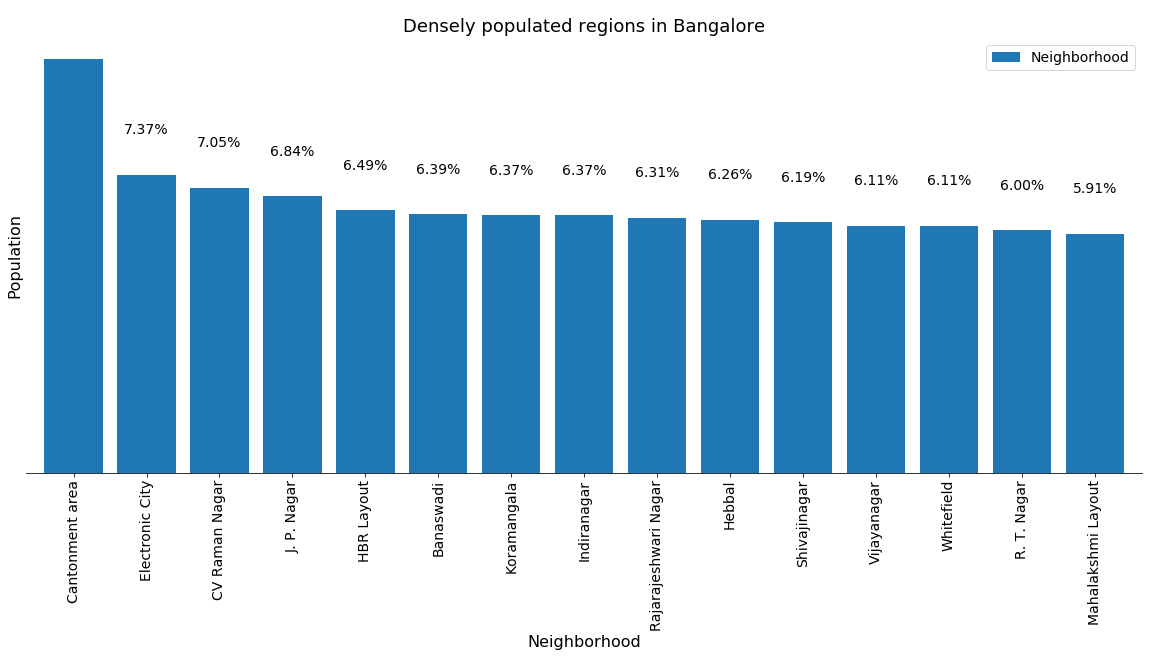

In [45]:
ax = df_top.plot(x='Neighborhood' ,kind='bar', figsize=(20,8), width=0.8, edgecolor=None, fontsize=20)

ax.legend(labels=df_top.columns, fontsize=14)
ax.set_title('Densely populated regions in Bangalore', fontsize=18) # add title to the plot
ax.set_xlabel('Neighborhood', fontsize=16) # add to x-label to the plot
ax.set_ylabel('Population', fontsize=16) # add y-label to the plot

# ax.tick_params(fontsize=10)
plt.yticks([])
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    h = height/100
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(h), (p.get_x()+.5*width, p.get_y() + height + 1), ha = 'center',fontsize=14)

plt.show()

## Results  
By the population graph and the cluster map, we see that the first cluster contains most of the populous neighborhoods. Hence, by placing more ATM machine’s in the first cluster’s neighborhoods, the needs of the customers will be successfully met and the complaints will reduce drastically.

During this work, some of the machine learning techniques, data wrangling with pandas and data visualization techniques were put to use.